# **Random Forest Algorithm**

The Random Forest Algorithm is a machine learning technique that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting. It's useful for stock market prediction because it can handle a large number of variables, capture complex relationships in data, and provide robust predictions, making it well-suited for the dynamic and noisy nature of stock market data.


In [73]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#Sklearn, a popular machine learning library, offers various tools for implementing models.
#The RandomForestClassifier in Sklearn is particularly useful for building a Random Forest model, which combines multiple decision trees to enhance predictive accuracy and manage overfitting.

In [74]:
#get stock market data from csv file

df_stock = pd.read_csv('..\Data\GOOG_historical_data_yfinance.csv')

df_stock.tail()

,Open,High,Low,Close,Volume,Date
2511,139.100006,141.100006,139.000000,140.020004,17306400,2023-11-22
2512,139.539993,139.677002,137.470001,138.220001,8828600,2023-11-24
2513,137.570007,139.630005,137.539993,138.050003,17886400,2023-11-27
2514,137.630005,138.660004,137.039993,138.619995,17046900,2023-11-28
2515,138.985001,139.669998,136.294998,136.399994,20994400,2023-11-29


In [75]:
# Features construction
df_stock['Open-Close'] = (df_stock.Open - df_stock.Close) / df_stock.Open
df_stock['High-Low'] = (df_stock.High - df_stock.Low) / df_stock.Low
df_stock['percent_change'] = df_stock['Close'].pct_change()
df_stock['std_10'] = df_stock['percent_change'].rolling(10).std()
df_stock['ret_10'] = df_stock['percent_change'].rolling(10).mean()
df_stock.dropna(inplace=True)

# Defining a threshold for a minor change
threshold = 0.01  # can be adjusted

# Creating output variable with 1 for buy, -1 for sell, and 0 for hold
df_stock['target'] = np.where(df_stock['Close'].shift(-1) > df_stock['Close'] * (1 + threshold), 1,
                     np.where(df_stock['Close'].shift(-1) < df_stock['Close'] * (1 - threshold), -1, 0))

# X is the input variable
X = df_stock[['Open-Close', 'High-Low', 'std_10', 'ret_10']]

# y is the target or output variable
y = df_stock['target']

In [76]:
#Train and Test Split

# Spliting the dataset into 75% training and 25% testing using scikit-learn's train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shapes - X: {}, y: {}".format(X_train.shape, y_train.shape))
print("Testing set shapes - X: {}, y: {}".format(X_test.shape, y_test.shape))

Training set shapes - X: (1879, 4), y: (1879,)
Testing set shapes - X: (627, 4), y: (627,)


In [77]:
# Create the model on train dataset
rf_classifier = RandomForestClassifier(random_state=42)
model = rf_classifier.fit(X_train, y_train)
print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

# Run the code to view the classification report metrics
y_pred = rf_classifier.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

Correct Prediction (%):  54.54545454545454
              precision    recall  f1-score   support

          -1       0.33      0.18      0.23       122
           0       0.61      0.85      0.71       346
           1       0.34      0.17      0.23       159

    accuracy                           0.55       627
   macro avg       0.43      0.40      0.39       627
weighted avg       0.49      0.55      0.49       627



**Visualization of the result**

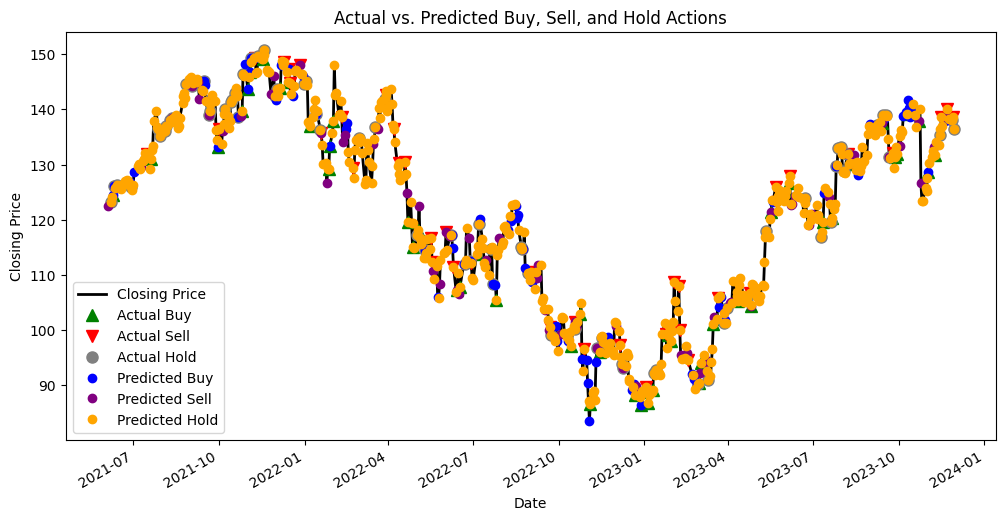

In [78]:

# Create a DataFrame with date index
df_visualize = df_stock.iloc[-len(y_test):].copy()
df_visualize['Actual'] = y_test
df_visualize['Predicted'] = y_pred

df_visualize['Date'] = pd.to_datetime(df_visualize['Date'])
df_visualize.set_index('Date', inplace=True)

# Plot actual and predicted actions
plt.figure(figsize=(12, 6))
df_visualize['Close'].plot(label='Closing Price', color='black', linestyle='-', linewidth=2)
df_visualize[df_visualize['Actual'] == 1]['Close'].plot(marker='^', markersize=8, linestyle='', color='g', label='Actual Buy')
df_visualize[df_visualize['Actual'] == -1]['Close'].plot(marker='v', markersize=8, linestyle='', color='r', label='Actual Sell')
df_visualize[df_visualize['Actual'] == 0]['Close'].plot(marker='o', markersize=8, linestyle='', color='gray', label='Actual Hold')

df_visualize[df_visualize['Predicted'] == 1]['Close'].plot(marker='o', markersize=6, linestyle='', color='b', label='Predicted Buy')
df_visualize[df_visualize['Predicted'] == -1]['Close'].plot(marker='o', markersize=6, linestyle='', color='purple', label='Predicted Sell')
df_visualize[df_visualize['Predicted'] == 0]['Close'].plot(marker='o', markersize=6, linestyle='', color='orange', label='Predicted Hold')

plt.title('Actual vs. Predicted Buy, Sell, and Hold Actions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()




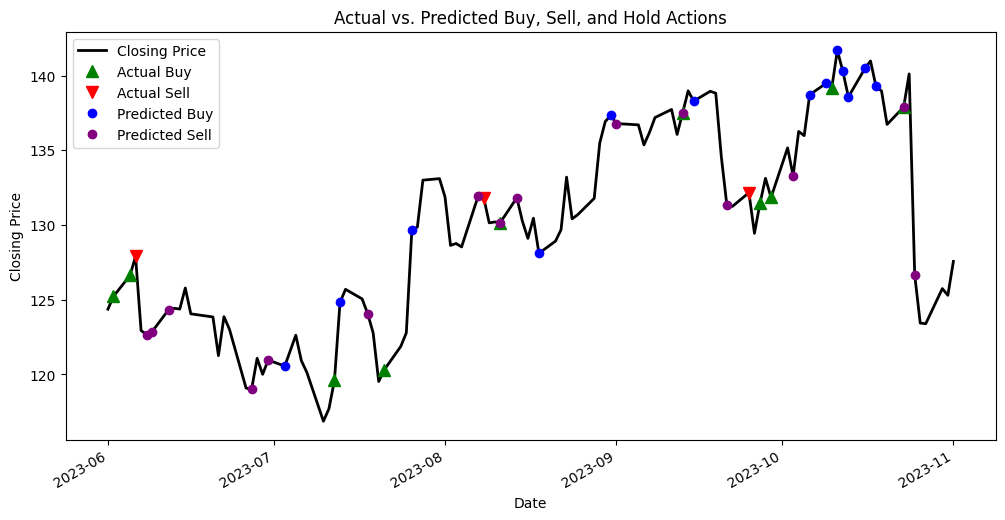

In [79]:
# Create a DataFrame with date index
df_visualize = df_stock.iloc[-len(y_test):].copy()
df_visualize['Actual'] = y_test
df_visualize['Predicted'] = y_pred

df_visualize['Date'] = pd.to_datetime(df_visualize['Date'])
df_visualize = df_visualize[(df_visualize['Date'] >= '2023-06-01') & (df_visualize['Date'] <= '2023-11-01')]
df_visualize.set_index('Date', inplace=True)

# Plot actual and predicted actions
plt.figure(figsize=(12, 6))
df_visualize['Close'].plot(label='Closing Price', color='black', linestyle='-', linewidth=2)
df_visualize[df_visualize['Actual'] == 1]['Close'].plot(marker='^', markersize=8, linestyle='', color='g', label='Actual Buy')
df_visualize[df_visualize['Actual'] == -1]['Close'].plot(marker='v', markersize=8, linestyle='', color='r', label='Actual Sell')
#df_visualize[df_visualize['Actual'] == 0]['Close'].plot(marker='o', markersize=8, linestyle='', color='gray', label='Actual Hold')

df_visualize[df_visualize['Predicted'] == 1]['Close'].plot(marker='o', markersize=6, linestyle='', color='b', label='Predicted Buy')
df_visualize[df_visualize['Predicted'] == -1]['Close'].plot(marker='o', markersize=6, linestyle='', color='purple', label='Predicted Sell')
#df_visualize[df_visualize['Predicted'] == 0]['Close'].plot(marker='o', markersize=6, linestyle='', color='orange', label='Predicted Hold')

plt.title('Actual vs. Predicted Buy, Sell, and Hold Actions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

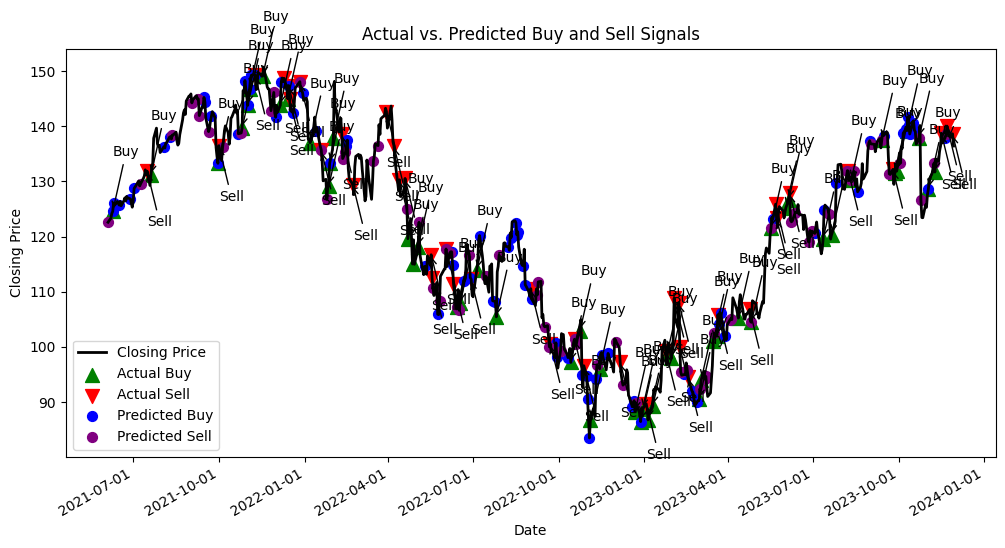

In [80]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create a DataFrame with date index
df_visualize = df_stock.iloc[-len(y_test):].copy()
df_visualize['Actual'] = y_test
df_visualize['Predicted'] = y_pred

df_visualize['Date'] = pd.to_datetime(df_visualize['Date'])
df_visualize.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(df_visualize.index, df_visualize['Close'], label='Closing Price', color='black', linewidth=2)

# Highlight actual buy signals with green arrows
plt.scatter(df_visualize.index[df_visualize['Actual'] == 1], df_visualize['Close'][df_visualize['Actual'] == 1], marker='^', s=100, color='g', label='Actual Buy')
for idx in df_visualize.index[df_visualize['Actual'] == 1]:
    plt.annotate('Buy', xy=(idx, df_visualize['Close'][idx]), xytext=(idx, df_visualize['Close'][idx] + 10),
                 arrowprops=dict(facecolor='green', arrowstyle='->'))

# Highlight actual sell signals with red arrows
plt.scatter(df_visualize.index[df_visualize['Actual'] == -1], df_visualize['Close'][df_visualize['Actual'] == -1], marker='v', s=100, color='r', label='Actual Sell')
for idx in df_visualize.index[df_visualize['Actual'] == -1]:
    plt.annotate('Sell', xy=(idx, df_visualize['Close'][idx]), xytext=(idx, df_visualize['Close'][idx] - 10),
                 arrowprops=dict(facecolor='red', arrowstyle='->'))

# Highlight predicted buy signals with blue circles
plt.scatter(df_visualize.index[df_visualize['Predicted'] == 1], df_visualize['Close'][df_visualize['Predicted'] == 1], marker='o', s=50, color='b', label='Predicted Buy')

# Highlight predicted sell signals with purple circles
plt.scatter(df_visualize.index[df_visualize['Predicted'] == -1], df_visualize['Close'][df_visualize['Predicted'] == -1], marker='o', s=50, color='purple', label='Predicted Sell')

plt.title('Actual vs. Predicted Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

plt.show()
